## An Analytical Detective

Crime is an international concern, but it is documented and handled in very different ways in different countries. In the United States, violent crimes and property crimes are recorded by the Federal Bureau of Investigation (FBI).  Additionally, each city documents crime, and some cities release data regarding crime rates. The city of Chicago, Illinois releases crime data from 2001 onward online.

There are two main types of crimes: violent crimes, and property crimes. In this problem, we'll focus on one specific type of property crime, called "motor vehicle theft" (sometimes referred to as grand theft auto). This is the act of stealing, or attempting to steal, a car. In this problem, we'll use some basic data analysis in R to understand the motor vehicle thefts in Chicago.

- ID: a unique identifier for each observation
- Date: the date the crime occurred
- LocationDescription: the location where the crime occurred
- Arrest: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made)
- Domestic: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic)
- Beat: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.
- District: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.
- CommunityArea: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.
- Year: the year in which the crime occurred.
- Latitude: the latitude of the location at which the crime occurred.
- Longitude: the longitude of the location at which the crime occurred.

In [3]:
mvt <- read.csv('dataset/mvtWeek1.csv')

In [4]:
str(mvt)

'data.frame':	191641 obs. of  11 variables:
 $ ID                 : int  8951354 8951141 8952745 8952223 8951608 8950793 8950760 8951611 8951802 8950706 ...
 $ Date               : Factor w/ 131680 levels "1/1/01 0:01",..: 42824 42823 42823 42823 42822 42821 42820 42819 42817 42816 ...
 $ LocationDescription: Factor w/ 78 levels "ABANDONED BUILDING",..: 72 72 62 72 72 72 72 72 72 72 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 1622 724 211 2521 423 231 1021 1215 ...
 $ District           : int  6 12 16 7 2 25 4 2 10 12 ...
 $ CommunityArea      : int  69 24 11 67 35 19 48 40 29 24 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude          : num  -87.6 -87.7 -87.8 -87.7 -87.6 ...


In [5]:
max(mvt$ID)

[1] 9181151

In [6]:
min(mvt$Beat)

[1] 111

In [7]:
sum(mvt$Arrest == TRUE)

[1] 15536

In [9]:
sum(mvt$LocationDescription == 'ALLEY')

[1] 2308

In [11]:
mvt$Date[3]

[1] 12/31/12 22:00
131680 Levels: 1/1/01 0:01 1/1/01 0:05 1/1/01 0:30 1/1/01 1:17 ... 9/9/12 9:50

In [12]:
# Converting date format
DateConvert <- as.Date(strptime(mvt$Date,'%m/%d/%y %H:%M'))

In [13]:
summary(DateConvert)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2001-01-01" "2003-07-10" "2006-05-21" "2006-08-23" "2009-10-24" "2012-12-31"

In [14]:
# Extract month and dow
mvt$Month <- months(DateConvert)
mvt$Weekday <- weekdays(DateConvert)

In [15]:
# Replace Date with new format
mvt$Date <- DateConvert

In [20]:
table(mvt$Month)


 10월  11월  12월   1월   2월   3월   4월   5월   6월   7월   8월   9월 
17086 16063 16426 16047 13511 15758 15280 16035 16002 16801 16572 16060 

In [21]:
which.min(table(mvt$Month))

2월 
  5

In [23]:
table(mvt$Weekday)


금요일 목요일 수요일 월요일 일요일 토요일 화요일 
 29284  27319  27416  27397  26316  27118  26791 

In [22]:
which.max(table(mvt$Weekday))

금요일 
     1

In [28]:
table(mvt$Arrest, mvt$Month)

       
         10월  11월  12월   1월   2월   3월   4월   5월   6월   7월   8월   9월
  FALSE 15744 14807 15029 14612 12273 14460 14028 14848 14772 15477 15243 14812
  TRUE   1342  1256  1397  1435  1238  1298  1252  1187  1230  1324  1329  1248

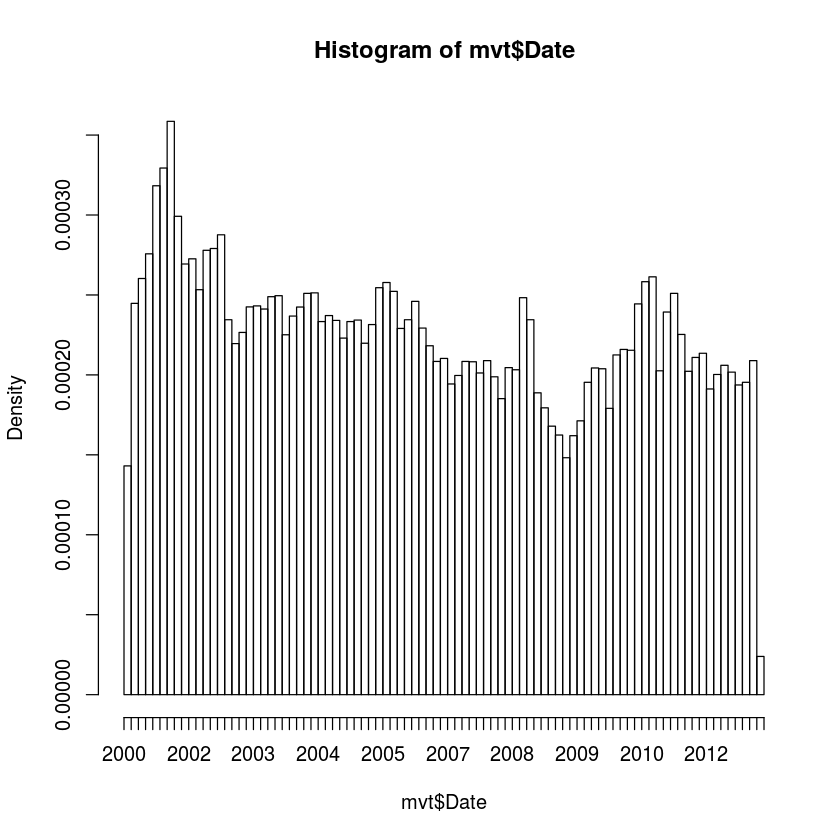

In [29]:
hist(mvt$Date, breaks=100)

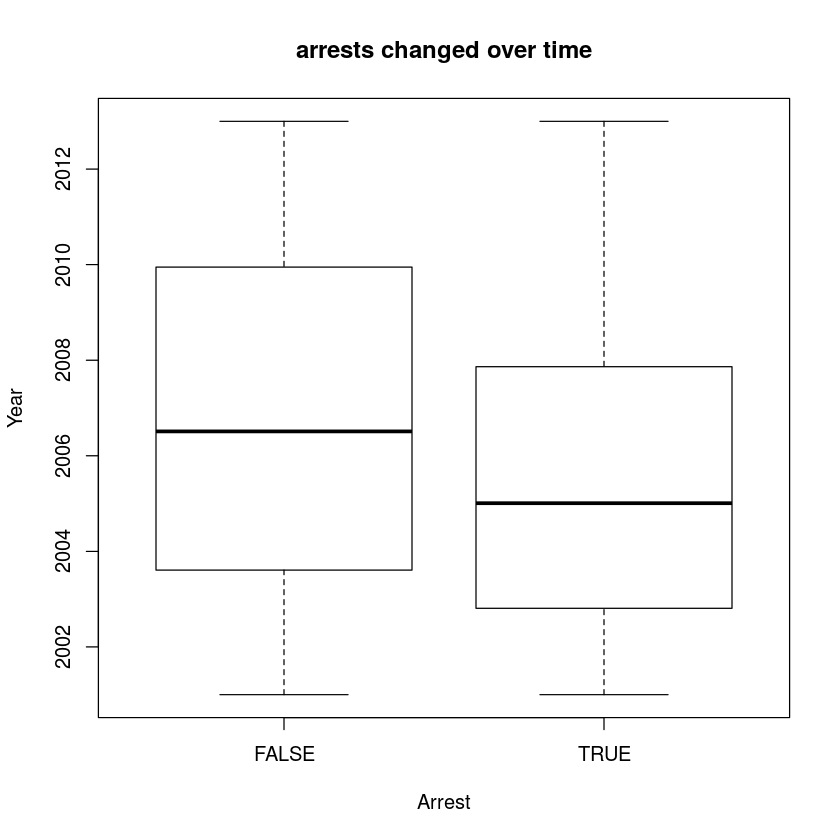

In [37]:
boxplot(mvt$Date ~ mvt$Arrest, main='arrests changed over time', xlab='Arrest', ylab='Year')

In [38]:
table(mvt$Arrest, mvt$Year)

       
         2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012
  FALSE 18517 16638 14859 15169 14956 14796 13068 13425 11327 14796 15012 13542
  TRUE   2152  2115  1798  1693  1528  1302  1212  1020   840   701   625   550

In [42]:
table(mvt$Year)


 2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012 
20669 18753 16657 16862 16484 16098 14280 14445 12167 15497 15637 14092 

In [43]:
2152 / 20669

[1] 0.1041173

In [44]:
1212 / 14280

[1] 0.08487395

In [46]:
550 / 14092

[1] 0.03902924

In [48]:
sort(table(mvt$LocationDescription), decreasing=TRUE)


                                         STREET 
                                         156564 
                 PARKING LOT/GARAGE(NON.RESID.) 
                                          14852 
                                          OTHER 
                                           4573 
                                          ALLEY 
                                           2308 
                                    GAS STATION 
                                           2111 
                         DRIVEWAY - RESIDENTIAL 
                                           1675 
                  RESIDENTIAL YARD (FRONT/BACK) 
                                           1536 
                                      RESIDENCE 
                                           1302 
                               RESIDENCE-GARAGE 
                                           1176 
                                VACANT LOT/LAND 
                                            985 
                   

In [68]:
# Create New DataFrame
Top5 <- subset(mvt , LocationDescription == 'STREET' | 
                     LocationDescription == 'PARKING LOT/GARAGE(NON.RESID.)' | 
                      LocationDescription == 'ALLEY' |
                    LocationDescription == 'GAS STATION' |
                    LocationDescription == 'DRIVEWAY - RESIDENTIAL')

In [64]:
str(Top5)

'data.frame':	177510 obs. of  13 variables:
 $ ID                 : int  8951354 8951141 8952223 8951608 8950793 8950760 8951611 8951802 8950706 8951585 ...
 $ Date               : Date, format: "2012-12-31" "2012-12-31" ...
 $ LocationDescription: Factor w/ 78 levels "ABANDONED BUILDING",..: 72 72 72 72 72 72 72 72 72 72 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE TRUE FALSE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 724 211 2521 423 231 1021 1215 1011 ...
 $ District           : int  6 12 7 2 25 4 2 10 12 10 ...
 $ CommunityArea      : int  69 24 67 35 19 48 40 29 24 29 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 41.8 41.8 41.9 ...
 $ Longitude          : num  -87.6 -87.7 -87.7 -87.6 -87.8 ...
 $ Month              : chr  "12월" "12월" "12월" "12월" ...
 $ Weekday            : chr  "월요일" "월요일" "월요일" "월요일" ...


In [69]:
# Alternately
Top5_alter <- subset(mvt, LocationDescription %in% c("STREET", 'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'GAS STATION', 'DRIVEWAY - RESIDENTIAL'))

In [70]:
str(Top5_alter)

'data.frame':	177510 obs. of  13 variables:
 $ ID                 : int  8951354 8951141 8952223 8951608 8950793 8950760 8951611 8951802 8950706 8951585 ...
 $ Date               : Date, format: "2012-12-31" "2012-12-31" ...
 $ LocationDescription: Factor w/ 78 levels "ABANDONED BUILDING",..: 72 72 72 72 72 72 72 72 72 72 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE TRUE FALSE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 724 211 2521 423 231 1021 1215 1011 ...
 $ District           : int  6 12 7 2 25 4 2 10 12 10 ...
 $ CommunityArea      : int  69 24 67 35 19 48 40 29 24 29 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 41.8 41.8 41.9 ...
 $ Longitude          : num  -87.6 -87.7 -87.7 -87.6 -87.8 ...
 $ Month              : chr  "12월" "12월" "12월" "12월" ...
 $ Weekday            : chr  "월요일" "월요일" "월요일" "월요일" ...


To make our tables a bit nicer to read, we can refresh this factor variable.

In [71]:
Top5$LocationDescription <- factor(Top5$LocationDescription)

In [72]:
str(Top5)

'data.frame':	177510 obs. of  13 variables:
 $ ID                 : int  8951354 8951141 8952223 8951608 8950793 8950760 8951611 8951802 8950706 8951585 ...
 $ Date               : Date, format: "2012-12-31" "2012-12-31" ...
 $ LocationDescription: Factor w/ 5 levels "ALLEY","DRIVEWAY - RESIDENTIAL",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE TRUE FALSE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 724 211 2521 423 231 1021 1215 1011 ...
 $ District           : int  6 12 7 2 25 4 2 10 12 10 ...
 $ CommunityArea      : int  69 24 67 35 19 48 40 29 24 29 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 41.8 41.8 41.9 ...
 $ Longitude          : num  -87.6 -87.7 -87.7 -87.6 -87.8 ...
 $ Month              : chr  "12월" "12월" "12월" "12월" ...
 $ Weekday            : chr  "월요일" "월요일" "월요일" "월요일" ...


In [74]:
table(Top5$LocationDescription, Top5$Arrest)

                                
                                  FALSE   TRUE
  ALLEY                            2059    249
  DRIVEWAY - RESIDENTIAL           1543    132
  GAS STATION                      1672    439
  PARKING LOT/GARAGE(NON.RESID.)  13249   1603
  STREET                         144969  11595

In [75]:
table(Top5$LocationDescription)


                         ALLEY         DRIVEWAY - RESIDENTIAL 
                          2308                           1675 
                   GAS STATION PARKING LOT/GARAGE(NON.RESID.) 
                          2111                          14852 
                        STREET 
                        156564 

In [76]:
249 / 2308

[1] 0.1078856

In [77]:
132 / 1675

[1] 0.07880597

In [78]:
439 / 2111

[1] 0.2079583

In [79]:
1603 / 14852

[1] 0.1079316

In [80]:
11595/ 156564

[1] 0.07405917

In [86]:
table(Top5$LocationDescription == 'GAS STATION', Top5$Weekday)

       
        금요일 목요일 수요일 월요일 일요일 토요일 화요일
  FALSE  26746  24956  25025  25008  24220  24917  24527
  TRUE     332    282    273    280    336    338    270

In [84]:
table(Top5$LocationDescription == 'DRIVEWAY - RESIDENTIAL', Top5$Weekday)

       
        금요일 목요일 수요일 월요일 일요일 토요일 화요일
  FALSE  26821  24975  25064  25033  24335  25053  24554
  TRUE     257    263    234    255    221    202    243